<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

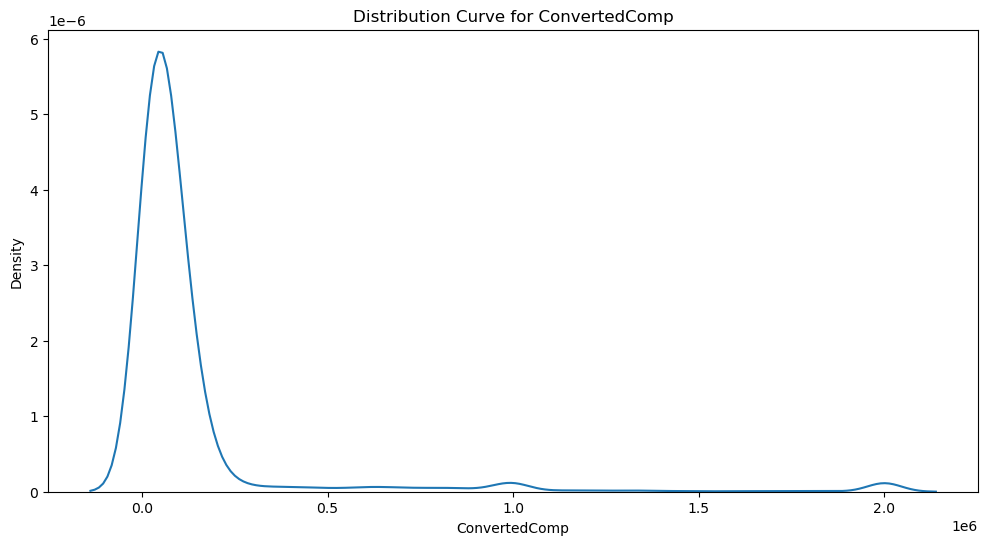

In [4]:
# your code goes here
plt.figure(figsize=(12, 6))
sns.kdeplot(df['ConvertedComp'])
plt.title('Distribution Curve for ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


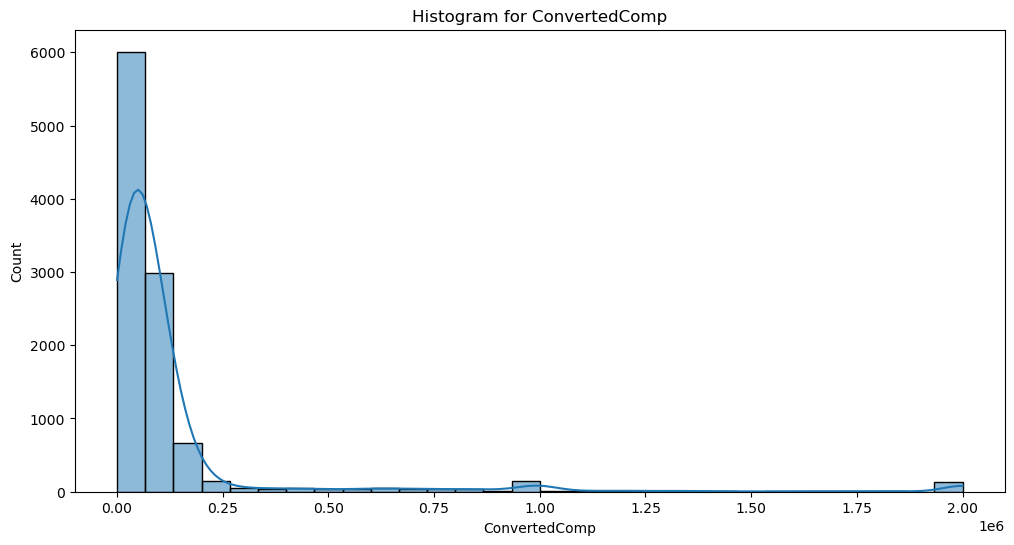

In [5]:
# your code goes here
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedComp'], bins=30, kde=True)
plt.title('Histogram for ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(f"The median of the column ConvertedComp is: {median_converted_comp}")

The median of the column ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"The number of responders identified themselves only as a Man is: {man_count}")

The number of responders identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
median_woman_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp of responders identified themselves only as a Woman is: {median_woman_converted_comp}")

The median ConvertedComp of responders identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
age_summary = df['Age'].describe()
print(f"The five-number summary for the column Age is:\n{age_summary}")

The five-number summary for the column Age is:
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


In [10]:
median_age = df['Age'].median()
print(f"The median age of survey respondents is: {median_age}")

The median age of survey respondents is: 29.0


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

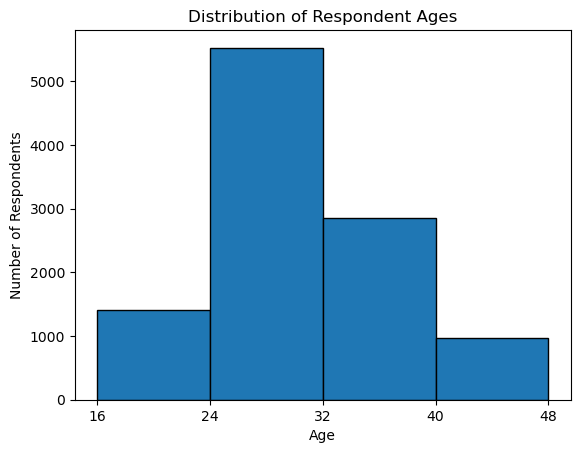

In [11]:
bins = [16, 24, 32, 40, 48]  # Define the bin edges
labels = ['16-24', '24-32', '32-40', '40-48']  # Labels for the bins

plt.hist(df['Age'].dropna(), bins=bins, edgecolor='black')  
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondent Ages')
plt.xticks(bins, labels)  # Set the x-axis ticks to your custom labels
plt.show()

Plot a histogram of the column `Age`.


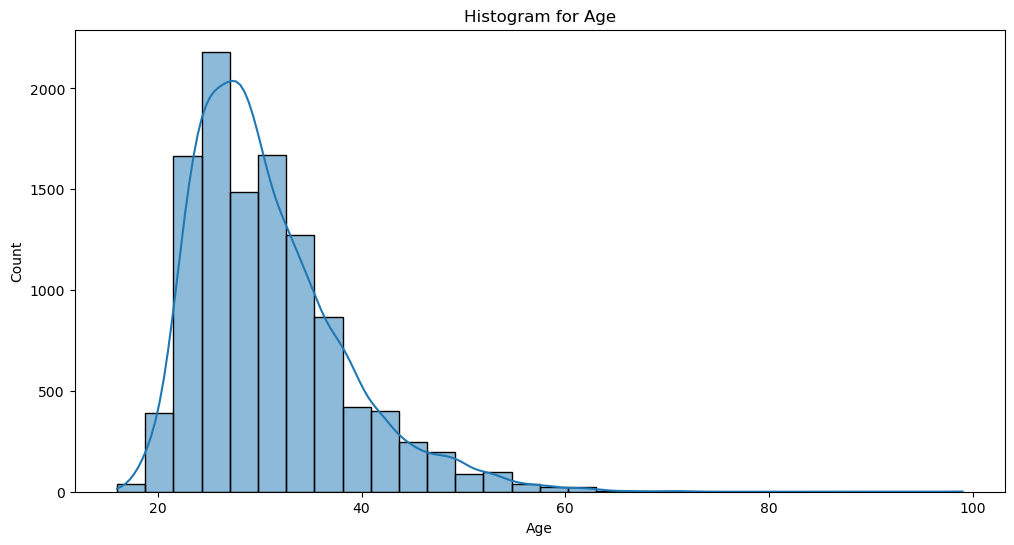

In [12]:
# your code goes here
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


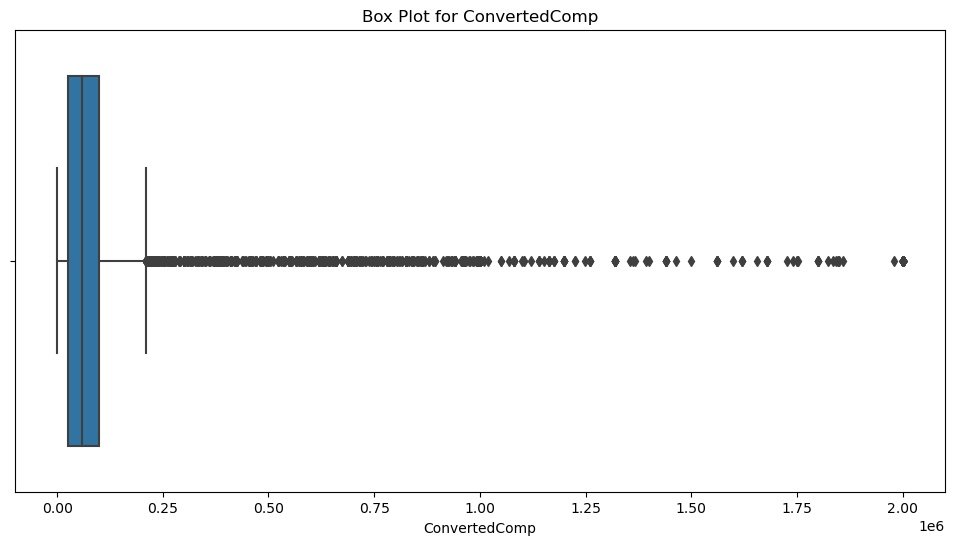

In [13]:
# your code goes here
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot for ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"The Inter Quartile Range (IQR) for the column ConvertedComp is: {IQR}")

The Inter Quartile Range (IQR) for the column ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The lower bound for outliers is: {lower_bound}")
print(f"The upper bound for outliers is: {upper_bound}")

The lower bound for outliers is: -82830.0
The upper bound for outliers is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# your code goes here
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print(f"The number of outliers in the ConvertedComp column is: {outliers_count}")

The number of outliers in the ConvertedComp column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
unique_age_values = df['Age'].unique()
print(f"Unique values in the 'Age' column:\n{unique_age_values}")

Unique values in the 'Age' column:
[22.  23.  28.  26.  29.  31.  38.  47.  34.  32.  21.  44.  42.  27.
 43.  18.  37.  33.  19.  24.  25.  36.  35.  30.  39.  41.  54.   nan
 40.  45.  51.  57.  52.  48.  49.  46.  20.  53.  50.  59.  61.  63.
 65.  58.  56.  17.  46.5 60.  71.  55.  29.5 62.  26.5 26.3 67.  16.
 72.  66.  24.5 69.  99.  43.5 22.5 31.5]


In [19]:
import numpy as np

# Replace non-numeric values in the 'Age' column with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check the data types of each column
print(df.dtypes)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [20]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation between 'Age' and all other numeric columns
correlation_age = df[numeric_columns].corr()['Age']
print(f"The correlation between Age and all other numerical columns is:\n{correlation_age}")

The correlation between Age and all other numerical columns is:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


In [21]:
median_converted_comp = df['ConvertedComp'].median()
print(f"The median of the column ConvertedComp is: {median_converted_comp}")

The median of the column ConvertedComp is: 57745.0


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'ConvertedComp' column
# You can use the z-score to identify and remove outliers

# Calculate z-scores for 'ConvertedComp'
z_scores = (df['ConvertedComp'] - df['ConvertedComp'].mean()) / df['ConvertedComp'].std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Identify and remove outliers
df_no_outliers = df[(z_scores < outlier_threshold) & (z_scores > -outlier_threshold)]

# Calculate the median of 'ConvertedComp' after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_no_outliers}")


The median ConvertedComp after removing outliers is: 57000.0


In [22]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers_below_Q1 = df[df['Age'] < Q1 - 1.5*IQR].shape[0]
print(f"The number of outliers below Q1 is: {outliers_below_Q1}")

The number of outliers below Q1 is: 0


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'ConvertedComp' column
# You can use the z-score to identify and remove outliers

# Calculate z-scores for 'ConvertedComp'
z_scores = (df['ConvertedComp'] - df['ConvertedComp'].mean()) / df['ConvertedComp'].std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
outlier_threshold = 3

# Identify and remove outliers
df_no_outliers = df[(z_scores < outlier_threshold) & (z_scores > -outlier_threshold)]

# Calculate the mean of 'ConvertedComp' after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")

The mean ConvertedComp after removing outliers is: 94163.72674531039


In [25]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate the correlation between 'Age' and all other numeric columns
correlation_age = df[numeric_columns].corr()['Age']

# Find the column with the highest correlation (excluding 'Age' with itself)
highest_correlation_column = correlation_age[correlation_age.index != 'Age'].idxmax()

print(f"The column with the highest correlation with 'Age' is: {highest_correlation_column}")

The column with the highest correlation with 'Age' is: ConvertedComp
